## Imports

In [29]:
import pandas as pd
import agentpy as ap
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

## Ingest Data

In [3]:
data = ap.DataDict.load(exp_name='ee_results', exp_id=1, path='results')

fdf = data.variables.Firm.reset_index()

Loading from directory results/ee_results_1/
Loading variables_Worker.csv - Successful
Loading parameters_constants.json - Successful
Loading variables_Firm.csv - Successful
Loading reporters.csv - Successful
Loading info.json - Successful
Loading initial_attributes.csv - Successful


## Firm Analysis

### Returns to Scale

In [67]:
# Get all firms still active at the end of the simulation.
df_a = df.loc[(df['t'] == df['t'].max()) & (df['size'] > 0)].copy()
df_a['log_size'] = np.log(df_a['size'])
df_a['log_output'] = np.log(df_a['output'])

In [68]:
# Prepare the data
X = sm.add_constant(df_a['log_size'])  # Adds a constant (intercept) to the predictor
y = df_a['log_output']

# Fit the model
model = sm.OLS(y, X)
results = model.fit()

# Get summary statistics
summary = results.summary()
print(summary)

# Predicted values from the model
y_pred = results.predict(X)

                            OLS Regression Results                            
Dep. Variable:             log_output   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                 2.637e+04
Date:                Sun, 08 Oct 2023   Prob (F-statistic):               0.00
Time:                        11:53:42   Log-Likelihood:                 438.68
No. Observations:                1889   AIC:                            -873.4
Df Residuals:                    1887   BIC:                            -862.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0128      0.006   1647.124      0.0

<Figure size 1000x600 with 0 Axes>

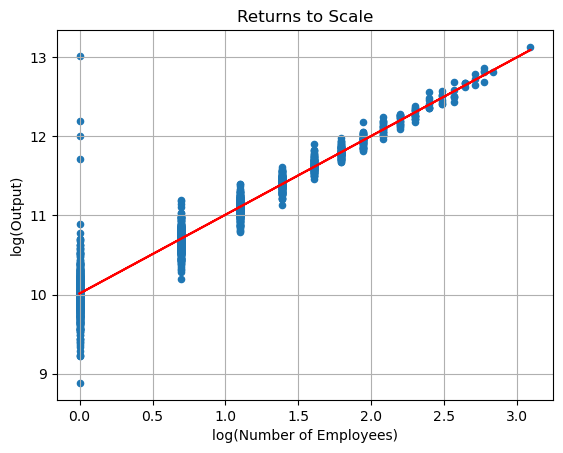

In [72]:
# Plotting the Zipf plot
plt.figure(figsize=(10, 6))
df_a.plot(kind='scatter', x='log_size', y='log_output')
plt.plot(df_a['log_size'], y_pred, color='red', label='OLS Fit')
plt.xlabel('log(Number of Employees)')
plt.ylabel('log(Output)')
plt.title('Returns to Scale')
plt.grid(True)
plt.show()

## Firm Size Distribution

In [34]:
# Create firm size and frequency dataset.
ndata = df_a['size'].value_counts().reset_index().to_numpy()
ndata = np.log(ndata)

In [73]:
# Fit a regression line to the log-log data
X = sm.add_constant(ndata[:, 0])
model = sm.OLS(ndata[:, 1], X)
results = model.fit()
print(results.summary())

# Predicted values from the model
y_pred = results.predict(X)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     229.1
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           6.67e-11
Time:                        11:55:35   Log-Likelihood:                -12.786
No. Observations:                  18   AIC:                             29.57
Df Residuals:                      16   BIC:                             31.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.7855      0.339     22.983      0.0

/Users/barbieri/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


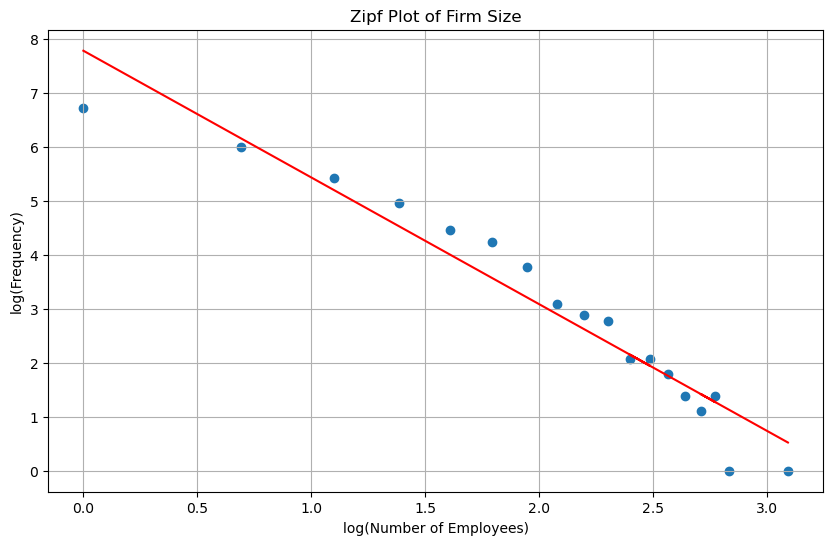

In [74]:
# Plotting the Zipf plot
plt.figure(figsize=(10, 6))
plt.scatter(ndata[:, 0], ndata[:, 1])
plt.plot(ndata[:, 0], y_pred, color='red', label='OLS Fit')
plt.xlabel('log(Number of Employees)')
plt.ylabel('log(Frequency)')
plt.title('Zipf Plot of Firm Size')
plt.grid(True)
plt.show()

In [75]:
alpha = 1 + (df_a['size'].count() / np.log(df_a['size'] / df_a['size'].min()).sum())
sigma = (alpha - 1) / np.sqrt(df_a['size'].count())
print(alpha, sigma)

2.469181895593426 0.03380333808385151


In [ ]:
df = results.variables.Firm.reset_index()

# Get all firms still active at the end of the simulation.
df_a = df.loc[(df['t'] == df['t'].max()) & (df['size'] > 0)].copy()
df_a['log_size'] = np.log(df_a['size'])
df_a['log_output'] = np.log(df_a['output'])

# Prepare the data
X = sm.add_constant(df_a['log_size'])  # Adds a constant (intercept) to the predictor
y = df_a['log_output']

# Fit the model
model = sm.OLS(y, X)
results = model.fit()

# Get summary statistics
summary = results.summary()
print(summary)

# Predicted values from the model
y_pred = results.predict(X)

In [ ]:
# Plotting the Zipf plot
plt.figure(figsize=(10, 6))
df_a.plot(kind='scatter', x='log_size', y='log_output')
plt.plot(df_a['log_size'], y_pred, color='red', label='OLS Fit')
plt.xlabel('log(Number of Employees)')
plt.ylabel('log(Output)')
plt.title('Returns to Scale')
plt.grid(True)
plt.show()